In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

#### 1.Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

In [2]:
Path_Energy = './Data/my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [121]:
data_w = data.resample('W').mean()

Text(0,0.5,'МВт')

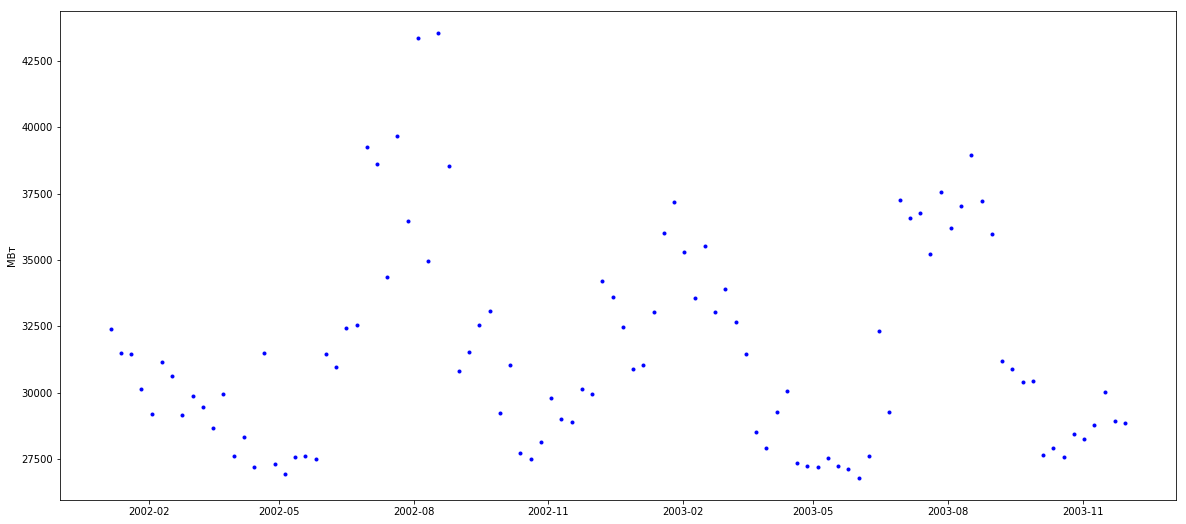

In [122]:
plt.figure(figsize=(20, 9))
plt.plot(data_w.index[:100], data_w['PJME_MW'].values[:100], '.b')
plt.ylabel ( 'МВт' )

Удалим неактуальные признаки

In [123]:
#data_w.drop('dayofmonth', axis=1,inplace=True)
#data_w.drop('dayofyear', axis=1,inplace=True)
#data_w.drop('dayofweek', axis=1,inplace=True)
data_w.drop('hour', axis=1,inplace=True)
#data_w.drop('is_holiday', axis=1,inplace=True)
#data_w.drop('is_prev_holiday', axis=1,inplace=True)
#data_w.drop('is_next_holiday', axis=1,inplace=True)
data_w.drop('year', axis=1,inplace=True)

In [124]:
data_w.head()

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,
2002-01-06,32392.160839,1.000000,3.517483,1.0,3.517483,1.0,3.517483,0.160839,0.000000,0.167832
2002-01-13,31487.386905,1.000000,10.000000,1.0,10.000000,2.0,3.000000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,1.000000,17.000000,1.0,17.000000,3.0,3.000000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,1.000000,24.000000,1.0,24.000000,4.0,3.000000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,1.428571,17.714286,1.0,31.000000,5.0,3.000000,0.000000,0.000000,0.000000


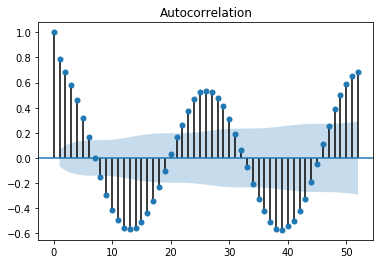

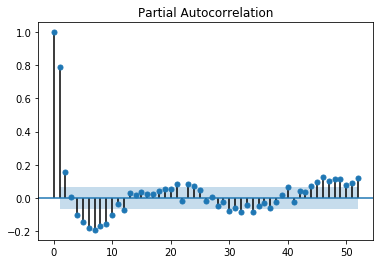

In [125]:
sm.graphics.tsa.plot_acf(data_w['PJME_MW'].values, lags=52)
sm.graphics.tsa.plot_pacf(data_w['PJME_MW'].values, lags=52)
plt.show()

In [126]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
import seaborn as sns

scl=StandardScaler()
tsne_ =TSNE(n_components=2)

X = data_w.iloc[:,:-1].values

Xscale = scl.fit_transform(X)
X_t = tsne_.fit_transform(Xscale)

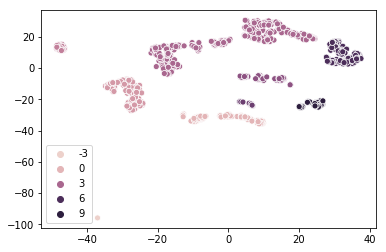

In [127]:
clast_0 = DBSCAN(eps=5, leaf_size=15 )
clast_1 = DBSCAN(eps=2, leaf_size=5)
X_clast =clast_0.fit_predict(X_t)
X_scale_clast =clast_1.fit_predict(Xscale)

sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_clast)
plt.show()

In [128]:
print('Число кластеров в календаре с масштабированием: ',len(np.unique(X_scale_clast)))
print('Число кластеров в календаре: ',len(np.unique(X_clast)))

Число кластеров в календаре с масштабированием:  7
Число кластеров в календаре:  9


In [129]:
data_w['week_quarter'] = X_clast

Физический смысл распределения нового параметра не просматривается

In [130]:
data_w.iloc[np.where(data_w['week_quarter']==0)[0]].iloc[:10,:]

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,week_quarter
Date,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,3.517483,1.0,3.517483,1.0,3.517483,0.160839,0.0,0.167832,0
2002-01-27,30141.529762,1.000000,24.000000,1.0,24.000000,4.0,3.000000,0.142857,0.0,0.142857,0
2002-02-24,29144.130952,2.000000,21.000000,1.0,52.000000,8.0,3.000000,0.142857,0.0,0.142857,0
2002-06-02,31448.660714,5.285714,21.142857,2.0,150.000000,22.0,3.000000,0.142857,0.0,0.142857,0
2002-09-08,31535.172619,9.000000,5.000000,3.0,248.000000,36.0,3.000000,0.142857,0.0,0.142857,0
2002-10-20,27504.827381,10.000000,17.000000,4.0,290.000000,42.0,3.000000,0.142857,0.0,0.142857,0
2002-11-17,28881.886905,11.000000,14.000000,4.0,318.000000,46.0,3.000000,0.142857,0.0,0.142857,0
2003-01-26,37169.547619,1.000000,23.000000,1.0,23.000000,4.0,3.000000,0.142857,0.0,0.142857,0
2003-02-23,33023.458333,2.000000,20.000000,1.0,51.000000,8.0,3.000000,0.142857,0.0,0.142857,0


Добавим параметры методом PCA

In [131]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
Xpca=pca.fit_transform(Xscale[:,1:])
Xpca.shape

(866, 2)

In [132]:
data_w['pca1']=Xpca[:,0]
data_w['pca2']=Xpca[:,1]

Добавим к нашей модели 1-е разности

In [133]:
first_diff =np.array(data_w.iloc[1:,0].values - data_w.iloc[:-1,0].values).astype('float32') 
data_w['diff1'] = 0
data_w['diff1'] =  data_w['diff1'].astype('float') 
data_w['diff1'].values[1:] = first_diff

Логарифм показателя

In [134]:
first_diff_l =np.log(data_w.iloc[1:,0].values) 
data_w['diff1_l'] = 0
data_w['diff1_l'] =  data_w['diff1_l'].astype('float') 
data_w['diff1_l'].values[1:] = first_diff_l

Добавим скользящее среднее по всей модели с глубиной 26 недель.

In [135]:
data_w['w_13']=data_w['PJME_MW'].rolling(window=13).mean()

Добавим экспонентциальную среднюю

In [136]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_w['exp_0_05'] = exponential_smoothing(data_w['PJME_MW'], 0.05)

В результате получаем

In [137]:
data_w.head(100)

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,week_quarter,pca1,pca2,diff1,diff1_l,w_13,exp_0_05
Date,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,3.517483,1.0,3.517483,1.0,3.517483,0.160839,0.000000,0.167832,0,-3.235063,-3.385826,0.000000,0.000000,NaN,32392.160839
2002-01-13,31487.386905,1.000000,10.000000,1.0,10.000000,2.0,3.000000,0.000000,0.000000,0.000000,1,-3.199949,0.364001,-904.773926,10.357342,NaN,32346.922142
2002-01-20,31452.880952,1.000000,17.000000,1.0,17.000000,3.0,3.000000,0.000000,0.142857,0.000000,2,-2.844548,-1.448393,-34.505951,10.356246,NaN,32302.220083
2002-01-27,30141.529762,1.000000,24.000000,1.0,24.000000,4.0,3.000000,0.142857,0.000000,0.142857,0,-2.801685,-1.604543,-1311.351196,10.313659,NaN,32194.185567
2002-02-03,29196.488095,1.428571,17.714286,1.0,31.000000,5.0,3.000000,0.000000,0.000000,0.000000,1,-2.897013,0.282281,-945.041687,10.281804,NaN,32044.300693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-11-02,28235.880952,10.285714,21.142857,4.0,303.000000,44.0,3.000000,0.000000,0.000000,0.000000,6,2.368255,0.870103,-218.256775,10.248349,31684.758305,31552.816440
2003-11-09,28790.541667,11.000000,6.000000,4.0,310.000000,45.0,3.000000,0.000000,0.000000,0.000000,6,2.462753,1.120467,554.660706,10.267802,31050.512884,31414.702701
2003-11-16,30017.428571,11.000000,13.000000,4.0,317.000000,46.0,3.000000,0.142857,0.142857,0.142857,7,3.011221,-2.467191,1226.886963,10.309533,30363.489532,31344.838994


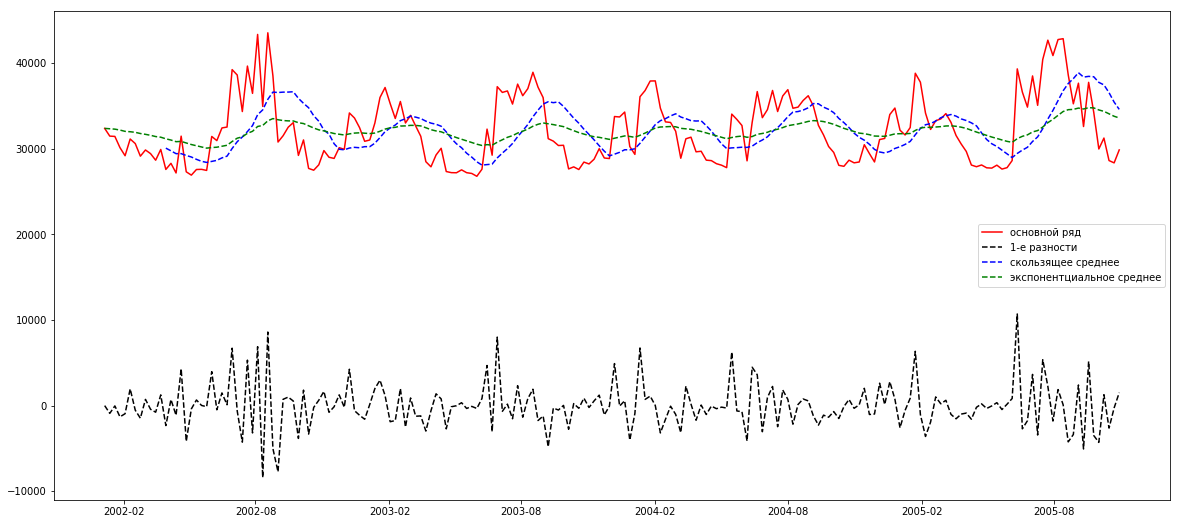

In [138]:
N100=200
plt.figure(figsize=(20, 9))
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд')
plt.plot(data_w.index[:N100],data_w['diff1'][:N100],'--k',label ='1-е разности')
plt.plot(data_w.index[:N100],data_w['w_13'][:N100],'--b',label ='скользящее среднее')
plt.plot(data_w.index[:N100],data_w['exp_0_05'][:N100],'--g',label ='экспонентциальное среднее')
plt.legend()
plt.show()

Выделение существенных признаков

In [139]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
scl_target=StandardScaler() 
p=13
h=1
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

In [140]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new = sfm.transform(X)
X_new.shape

NameError: name 'y' is not defined

#### 2.Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков. 

#### 3.Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.

#### 4.Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.

#### 5.Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10i-й до (i+1)10 -й,... ,от 90 до 100-й точках (используйте осреднение по десяткам точек)

#### 6.Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда